In [19]:
import pickle
import shap
import pandas as pd
from sklearn.model_selection import train_test_split

import xgboost as xgb
import shap.benchmark as benchmark

In [20]:
def shap_analysis_model():
    with open("finalized_model.pkl", "rb") as file:
      model = pickle.load(file)
    with open("vectorizer.pkl", "rb") as file:
      vectorizer = pickle.load(file)

    data = pd.read_csv("data/reduced_data.csv")
    data = data.dropna(subset=["content"])

    X = data["content"]
    y = data["retweets"]

    _, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=31232)
    X_test = vectorizer.transform(X_test).toarray()

    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)

    feature_names = vectorizer.get_feature_names_out()
    print("2586: " + feature_names[2586])
    print("2023: " + feature_names[2023])
    print("2451: " + feature_names[2451])
    print("170: " + feature_names[170])
    print("2542: " + feature_names[2542])
    print("515: " + feature_names[515])
    print("1198: " + feature_names[1198])
    print("1737: " + feature_names[1737])
    print("684: " + feature_names[684])
    print("2498: " + feature_names[2498])
    print("1786: " + feature_names[1786])

    shap.summary_plot(shap_values, feature_names=feature_names)
    shap.plots.waterfall(shap_values[0])
    shap.plots.beeswarm(shap_values)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


2586: twitter
2023: realdonaldtrump
2451: the
170: and
2542: trump
515: com
1198: http
1737: of
684: democrats
2498: to
1786: our


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


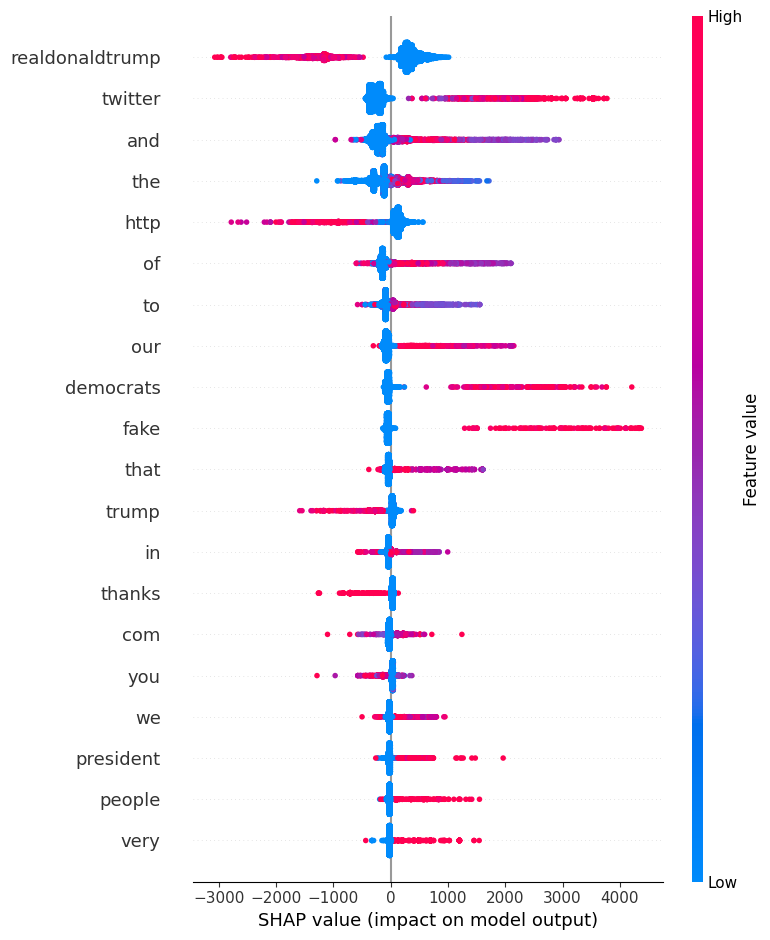

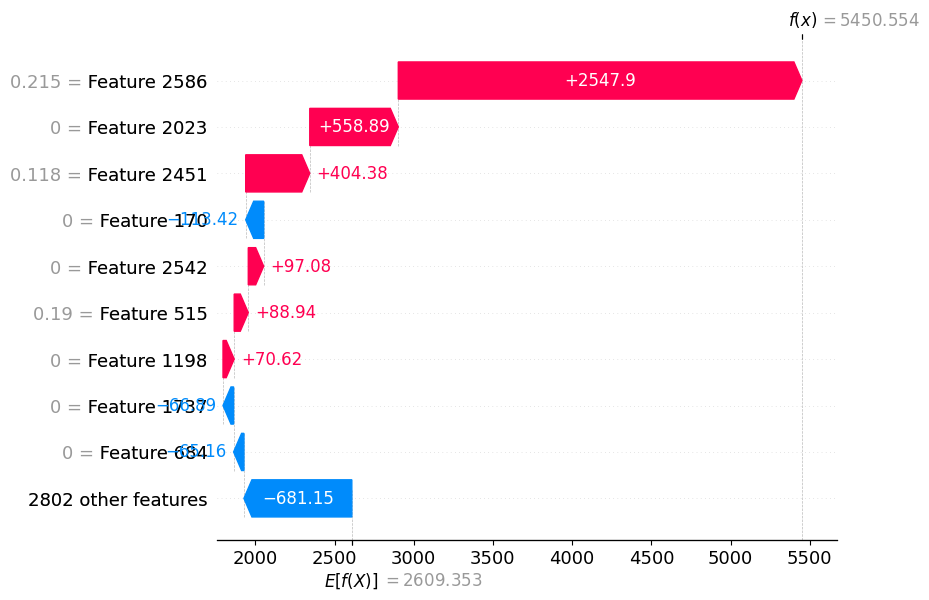

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


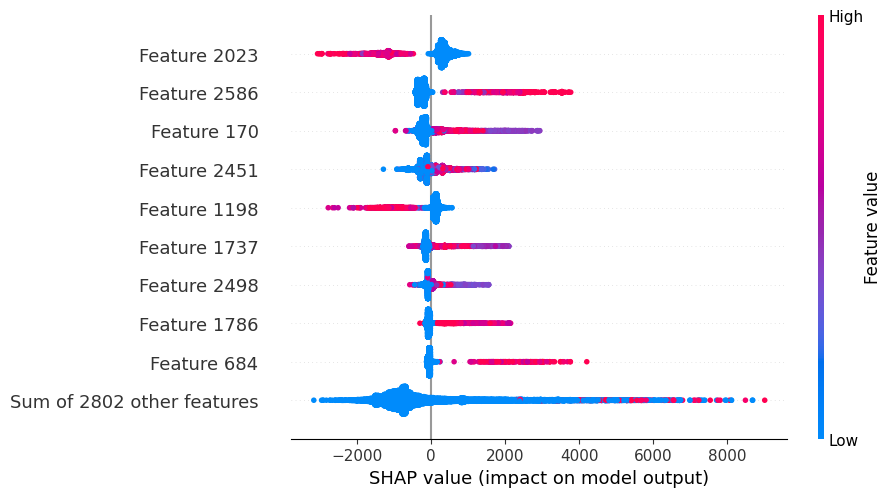

In [21]:
shap_analysis_model()